In [1]:
%matplotlib inline
import string
import matplotlib.pyplot as plt
import nltk
import re
from matplotlib import rcParams
import matplotlib as mtp
plt.style.use('default') ### haciendo los graficos un poco mas bonitos xD
rcParams['figure.figsize'] = (15, 5)
import unidecode
from subprocess import check_output
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import datetime as datetime
import pandas as pd
import numpy as np


descrip = pd.read_csv('/home/pcsor/facu/datos_navent_fiuba/avisos.csv', sep=',', encoding='utf-8', low_memory=False)
postulaciones = pd.read_csv('/home/pcsor/facu/datos_navent_fiuba/fiuba_4_postulaciones.csv', sep=',', encoding='utf-8', low_memory=False)
vistas = pd.read_csv('/home/pcsor/facu/datos_navent_fiuba/fiuba_3_vistas.csv', sep=',', encoding='utf-8', low_memory=False)
postulantes = pd.read_csv('/home/pcsor/facu/datos_navent_fiuba/postulantes.csv', sep=',', encoding='utf-8', low_memory=False)
postulantes = postulantes.drop('Unnamed: 0',axis=1)
#avisos = avisos.drop('Unnamed: 0',axis=1)

In [ ]:
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

In [5]:
stopw = 'un,de,https,una,unas,unos,uno,sobre,todo,tambien,tras,otro,algun,alguno,alguna,algunos,algunas,ser,es,soy,eres,somos,sos,estoy,esta,estamos,estas,estan,como,en\
,para,atras,porque,por que,estado,estaba,ante,antes,siendo,ambos,pero,por,poder,puede,puedo,podemos,podes,pueden,fui,fue,fuimos,fueron,hacer,hago,hace,hacemos,haceis,hacen\
,cada,fin,incluso,primero,desde,ir,voy,va,vamos,vais,van,vaya,bueno,ha,tener,tengo,tiene,tenemos,teneis,tienen,el,la,lo,las,los,su,aqui,mio,tuyo,ellos,ellas,nos,nosotros\
,vosotros,vosotras,si,dentro,solo,solamente,ultimo,largo,haces,muchos,aquellos,aquellas,sus,entonces,cierto,ciertos,cierta,ciertas,intentar,intento,intenta,intentas\
,intentais,intentan,dos,bajo,arriba,encima,usar,uso,usas,usa,usamos,usais,usan,emplear,empleo,empleas,emplean,ampleamos,empleais,valor,muy,eras,eramos,eran,modo,bien,cual\
,cuando,donde,mientras,quien,con,entre,sin,podria,podrias,podriamos,podrian,podriais,yo,aquel,intentamos,ev,busqueda,ingresar,queres,haciendo,importante,encuentra,empresa\
,multinacional,encontramos,debe,argentina,nuestro,ubicada,inscribirse,se,in,est,opera,ingeni,solutix,requie,adecco,johnson,gust,yamanil,unomotos,anos,NaN,alianzas,proyectamos'
stopw = stopw.split(',')

In [7]:
descrip['descripcion'] = descrip['descripcion'].apply(lambda s: re.sub('<.*?>', '', s)) #####saco todo lo que sea codigo HTML
descrip['descripcion'] = descrip['descripcion'].apply(lambda s: re.sub(r'[^\w]', ' ', s)) ##### saco todo lo que no sea alfanumerico
descrip['descripcion'] = descrip['descripcion'].apply(lambda s: s.lower()) ###### lo paso a minuscula
descrip['descripcion'] = descrip['descripcion'].apply(lambda s: unidecode.unidecode(s)) ####### saco los acentos
descrip['descripcion'] = descrip['descripcion'].apply(lambda s: re.sub(r'\b\w{1,3}\b', '', s)) ###### remuevo las palabras cortas
descrip['descripcion'] = descrip['descripcion'].apply(lambda s: re.sub(' +',' ',s)) ###### remuevo los espacios en blanco de mas
descrip['descripcion'] = descrip['descripcion'].apply(lambda s: s.lstrip()) ###### remuevo los espacios en blanco de mas

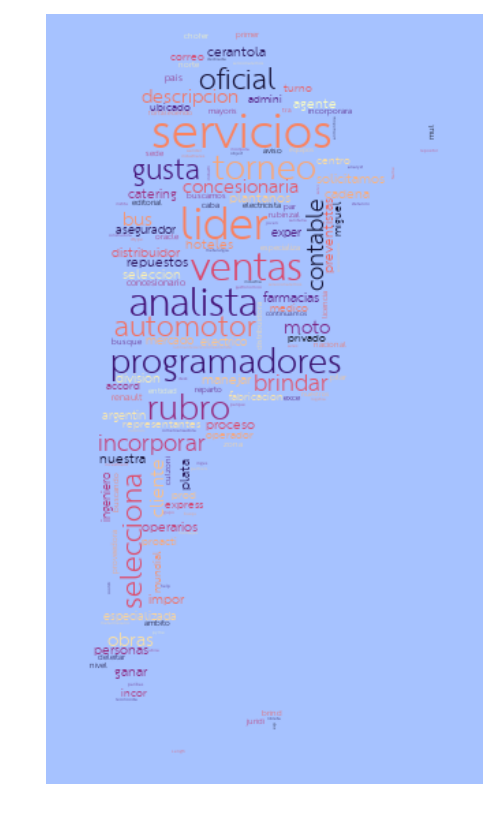

In [332]:
mascara = np.array(Image.open('/home/pcsor/facu/datos_navent_fiuba/mapa_argentina.png'))
wordcloud = WordCloud(
    background_color='#A6C2FF',
   font_path = '/usr/share/fonts/truetype/tlwg/Laksaman.ttf',
    mask=mascara,
    stopwords=stopw,
    max_words=700,
    min_font_size=1,
    max_font_size=35, 
    random_state=42,
    width=1920, 
    height=1080,
    colormap="magma"
).generate(str(descrip['descripcion']))

image_colors = ImageColorGenerator(mascara)
fig = plt.figure(1)

plt.imshow(wordcloud,interpolation="bilinear")
fig.set_size_inches(8,10)
plt.axis('off')
plt.savefig("wordcloug2.png", dpi=500)
plt.show()


#### Palabras mas buscadas segun genero:

In [8]:
vistas=vistas.rename(columns = {'idAviso':'idaviso'})
vistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961897 entries, 0 to 961896
Data columns (total 3 columns):
idaviso         961897 non-null int64
timestamp       961897 non-null object
idpostulante    961897 non-null object
dtypes: int64(1), object(2)
memory usage: 22.0+ MB


In [9]:
vistas = vistas.join(descrip.set_index('idaviso'), on='idaviso')
postulaciones = postulaciones.join(descrip.set_index('idaviso'), on= 'idaviso')

In [10]:
vistas = vistas.join(postulantes.set_index('idpostulante'), on='idpostulante')
postulaciones = postulaciones.join(postulantes.set_index('idpostulante'), on='idpostulante')

In [11]:
mujeres = postulaciones.loc[postulaciones['sexo'] == 'F']
hombres = postulaciones.loc[postulaciones['sexo'] == 'M']

In [12]:
mujeres1 = vistas.loc[vistas['sexo'] == 'F']
hombres1 = vistas.loc[vistas['sexo'] == 'M']

### Vistas por genero

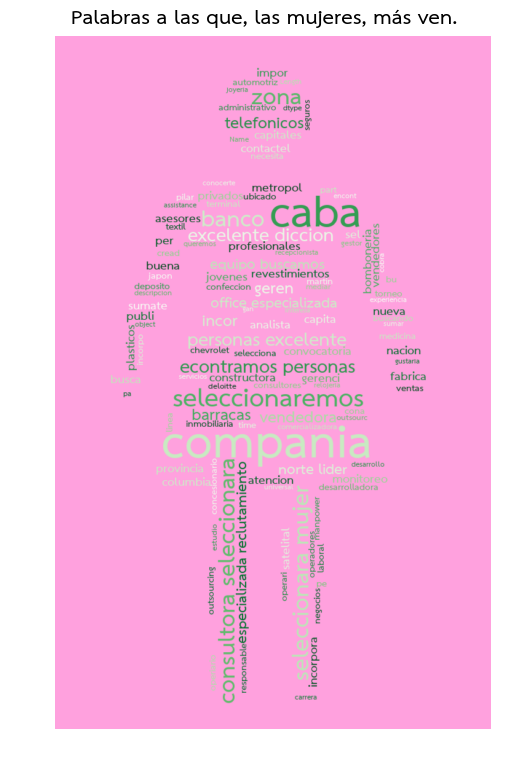

In [330]:
mascara = np.array(Image.open('/home/pcsor/facu/datos_navent_fiuba/mujeres2.png'))
wordcloud = WordCloud(
   background_color='#FFA1DE',
   font_path = '/usr/share/fonts/truetype/tlwg/Laksaman-Bold.ttf',
    mask=mascara,
    stopwords=stopw,
    max_words=1000,
    max_font_size=2000, 
    random_state=42,
    width=800, 
    height=600,
    colormap="Greens"
).generate(str(mujeres1['descripcion']))

image_colors = ImageColorGenerator(mascara)
fig = plt.figure(1)

plt.imshow(wordcloud,interpolation="bilinear")
fig.set_size_inches(7,9)
plt.axis('off')
fig.text(0.5, 0.9, 'Palabras a las que, las mujeres, más ven.', ha='center', va='center',fontweight='bold',fontsize = 14,fontname='Laksaman')
plt.savefig("mujeresV.png", dpi=500)
plt.show()

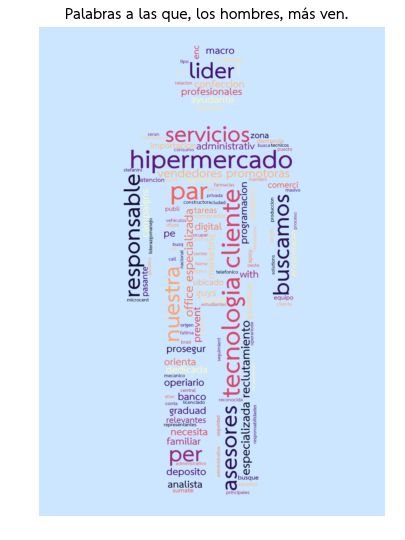

In [13]:
mascara = np.array(Image.open('/home/pcsor/facu/datos_navent_fiuba/hombres.png'))
wordcloud = WordCloud(
   background_color='#CCE6FF',
   font_path = '/usr/share/fonts/truetype/tlwg/Laksaman-Bold.ttf',
    mask=mascara,
    stopwords=stopw,
    max_words=1000,
    max_font_size=2000, 
    random_state=42,
    width=800, 
    height=600,
    colormap="magma"
).generate(str(hombres1['descripcion']))

image_colors = ImageColorGenerator(mascara)
fig = plt.figure(1)

plt.imshow(wordcloud,interpolation="bilinear")
fig.set_size_inches(7,9)
plt.axis('off')
fig.text(0.5, 0.9, 'Palabras a las que, los hombres, más ven.', ha='center', va='center',fontweight='bold',fontsize = 14,fontname='Laksaman')
plt.savefig("hombresV.png", dpi=500)
plt.show()

## Postulaciones por Genero

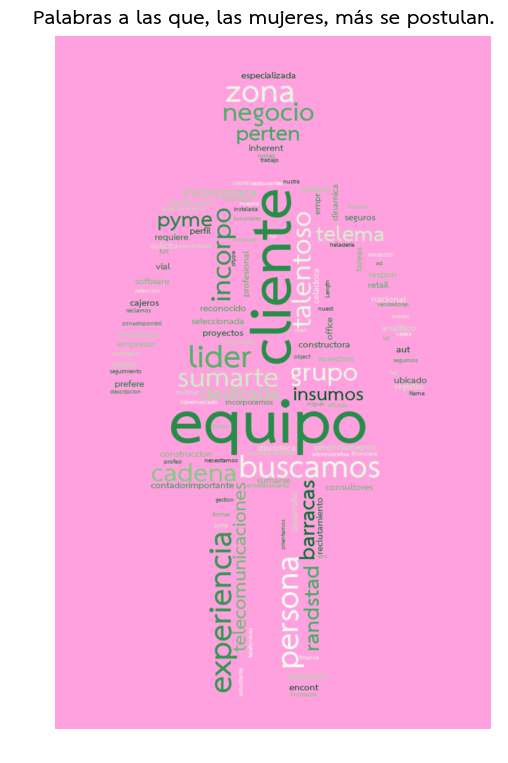

In [327]:
mascara = np.array(Image.open('/home/pcsor/facu/datos_navent_fiuba/mujeres2.png'))
wordcloud = WordCloud(
   background_color='#FFA1DE',
   font_path = '/usr/share/fonts/truetype/tlwg/Laksaman-Bold.ttf',
    mask=mascara,
    stopwords=stopw,
    max_words=1000,
    max_font_size=2000, 
    random_state=42,
    width=800, 
    height=600,
    colormap="Greens"
).generate(str(mujeres['descripcion']))

image_colors = ImageColorGenerator(mascara)
fig = plt.figure(1)


plt.imshow(wordcloud,interpolation="bilinear")
fig.set_size_inches(7,9)
fig.text(0.5, 0.9, 'Palabras a las que, las mujeres, más se postulan.', ha='center', va='center',fontweight='bold',fontsize = 14,fontname='Laksaman')
plt.axis('off')
plt.savefig("mujeresP.png", dpi=500)
plt.show()

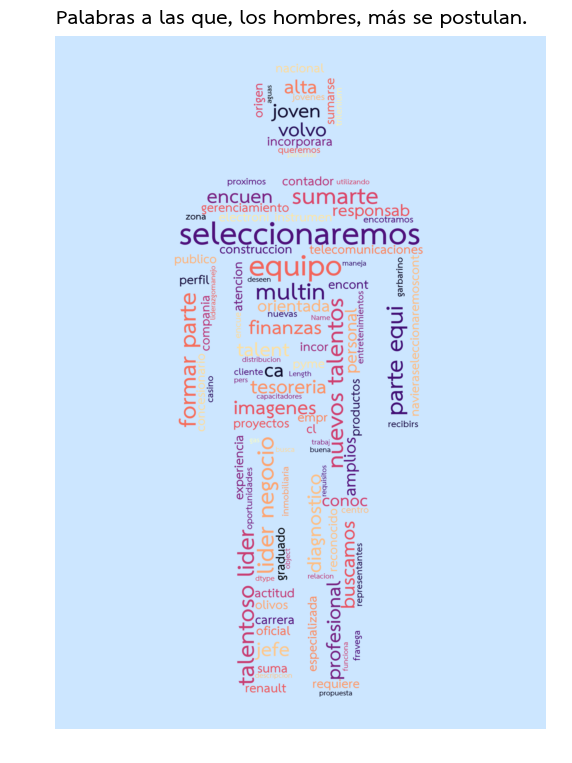

In [328]:
mascara = np.array(Image.open('/home/pcsor/facu/datos_navent_fiuba/hombres.png'))
wordcloud = WordCloud(
   background_color='#CCE6FF',
   font_path = '/usr/share/fonts/truetype/tlwg/Laksaman-Bold.ttf',
    mask=mascara,
    stopwords=stopw,
    max_words=1000,
    max_font_size=2000, 
    random_state=42,
    width=800, 
    height=600,
    colormap="magma"
).generate(str(hombres['descripcion']))

image_colors = ImageColorGenerator(mascara)
fig = plt.figure(1)

plt.imshow(wordcloud,interpolation="bilinear")
fig.set_size_inches(7,9)
plt.axis('off')
fig.text(0.5, 0.9, 'Palabras a las que, los hombres, más se postulan.', ha='center', va='center',fontweight='bold',fontsize = 14,fontname='Laksaman')
plt.savefig("hombresP.png", dpi=500)
plt.show()